<a href="https://colab.research.google.com/github/Pravallikavyas/Comment2likes/blob/main/cooment2likes(entevyuv10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df1=pd.read_csv("/content/videos-stats.csv")

In [ ]:
df1.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [ ]:
df1.isnull().sum()

Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [ ]:
df1=df1.dropna()

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.shape

(1879, 8)

In [ ]:
df1=df1.drop(["Unnamed: 0"],axis=1)

In [ ]:
df2=pd.read_csv("/content/comments.csv")

In [ ]:
df2.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [ ]:
df2.isnull().sum()

Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64

In [ ]:
df2=df2.dropna()

In [ ]:
df2=df2.drop_duplicates()

In [ ]:
df2=df2.drop(["Unnamed: 0"],axis=1)

In [ ]:
df2.shape

(18408, 4)

In [ ]:
new_df=df1.merge(df2,left_on="Video ID",right_on="Video ID",how="inner")

In [ ]:
new_df

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18619,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0


In [ ]:
new_df.rename(columns={'Likes_x':'Likes_video','Likes_y':'Likes_comments'},inplace = True)

In [ ]:
new_df

,Title,Video ID,Published At,Keyword,Likes_video,Comments,Views,Comment,Likes_comments,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18619,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0


In [ ]:
new_df.dtypes

Title              object
Video ID           object
Published At       object
Keyword            object
Likes_video       float64
Comments          float64
Views             float64
Comment            object
Likes_comments    float64
Sentiment         float64
dtype: object

In [ ]:
new_df["Likes_video"].value_counts()

-1.0         80
 406.0       40
 63825.0     40
 563.0       40
 329.0       40
             ..
 280080.0     1
 37.0         1
 2184.0       1
 15.0         1
 38.0         1
Name: Likes_video, Length: 1827, dtype: int64

In [ ]:
new_df.shape

(18624, 10)

In [ ]:
80*100/new_df.shape[0]

0.42955326460481097

In [ ]:
new_df["Comments"].value_counts()

29.0      90
16.0      77
21.0      75
173.0     70
32.0      65
          ..
280.0      8
6907.0     6
1004.0     3
67.0       2
7414.0     1
Name: Comments, Length: 1372, dtype: int64

In [ ]:
new_df[new_df["Comments"]==-1].shape

(19, 10)

In [ ]:
19*100/new_df.shape[0]

0.10201890034364261

In [ ]:
drop_index=new_df[new_df['Comments']==-1].index

In [ ]:
clear_index=new_df[new_df['Likes_video']==-1].index

In [ ]:
new_df.drop(drop_index,inplace=True)

In [ ]:
new_df.drop(clear_index,inplace=True)

In [ ]:
new_df

,Title,Video ID,Published At,Keyword,Likes_video,Comments,Views,Comment,Likes_comments,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18619,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0


In [ ]:
new_df.shape

(18525, 10)

In [ ]:
df1

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...
1874,Live Day 1- Introduction To Machine Learning A...,4UJelID_ICw,2022-02-01,machine learning,1861.0,184.0,37959.0
1875,Complete Roadmap for Machine Learning | ML Roa...,T4MLrtOKPjY,2021-05-11,machine learning,9615.0,648.0,319957.0
1876,Should You Learn Machine Learning?,AO6urf07KjE,2021-06-14,machine learning,10259.0,416.0,386360.0
1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,2017-10-08,machine learning,2981.0,72.0,431421.0


In [ ]:
grp_df=df1.groupby("Keyword")["Likes"].sum()
grp_df

Keyword
animals              28909480.0
apple                 4959314.0
asmr                  1830765.0
bed                  20842016.0
biology               3124738.0
business              3455285.0
chess                 1693992.0
cnn                    441787.0
computer science      1615850.0
crypto                 426068.0
cubes                15153060.0
data science           858789.0
education             1495016.0
finance                516184.0
food                  4560703.0
game development      1308934.0
gaming                1070583.0
google               21202537.0
history              13670533.0
how-to                7627111.0
interview             3666347.0
literature             819969.0
lofi                  3010876.0
machine learning      1693347.0
marvel               10518960.0
mathchemistry         1407730.0
minecraft             3058978.0
movies                1384796.0
mrbeast             105295718.0
mukbang               6363299.0
music                14452653.0


<Axes: title={'center': 'Keywords/No of likes Of videos'}, xlabel='Keyword'>

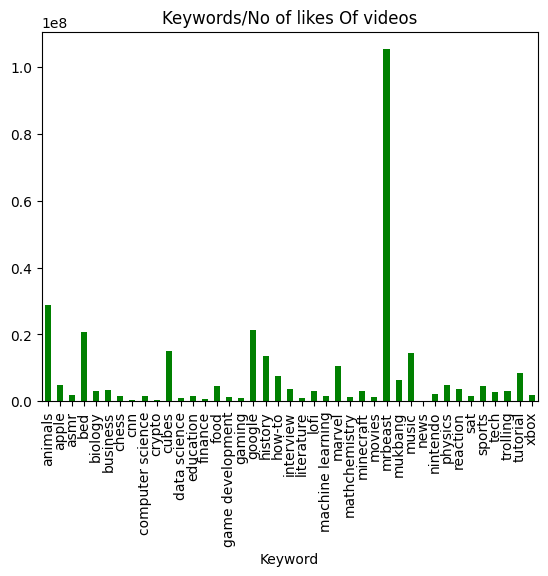

In [ ]:
grp_df.plot.bar(title="Keywords/No of likes Of videos",color="green")

<Axes: title={'center': 'Keywords/No of Comments Of Videos'}, ylabel='Keyword'>

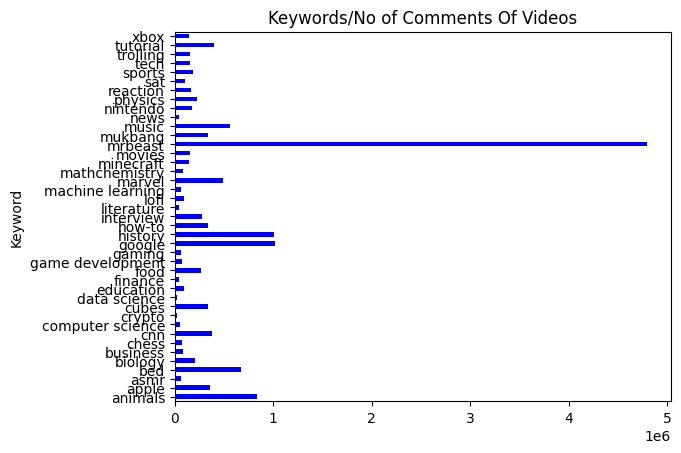

In [ ]:
#fig = plt.figure(figsize =(40,20))
(df1.groupby("Keyword")["Comments"].sum()).plot(title="Keywords/No of Comments Of Videos",color="blue",kind="barh")

<Axes: title={'center': 'Keywords/No of views of videos'}, ylabel='Keyword'>

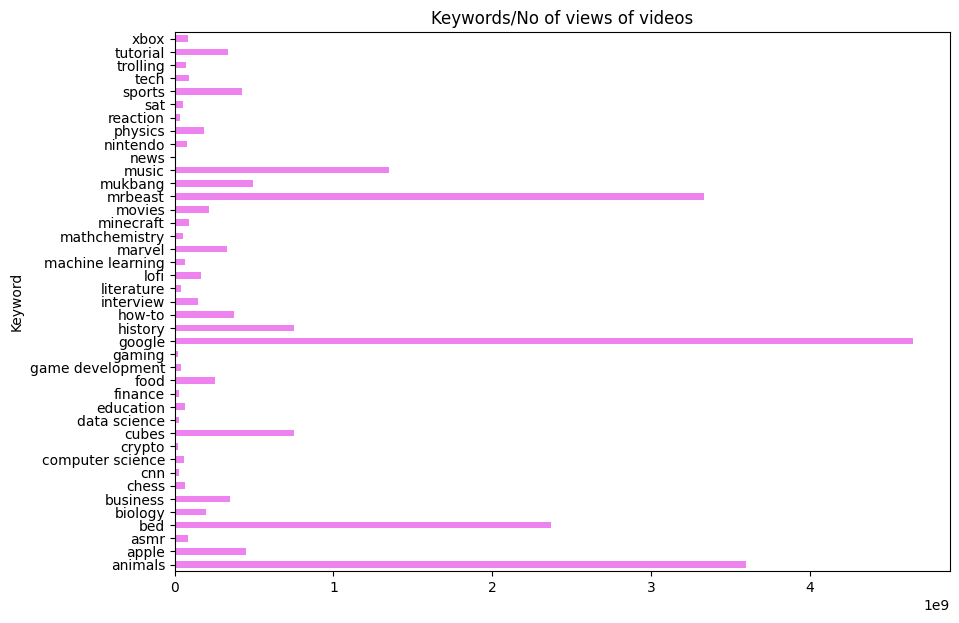

In [ ]:
fig = plt.figure(figsize =(10,7))
(df1.groupby("Keyword")["Views"].sum()).plot(title="Keywords/No of views of videos",kind="barh",color="violet")

In [ ]:
new_df

,Title,Video ID,Published At,Keyword,Likes_video,Comments,Views,Comment,Likes_comments,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18619,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0


<Axes: title={'center': 'Keywords/No of likes of comments'}, ylabel='Keyword'>

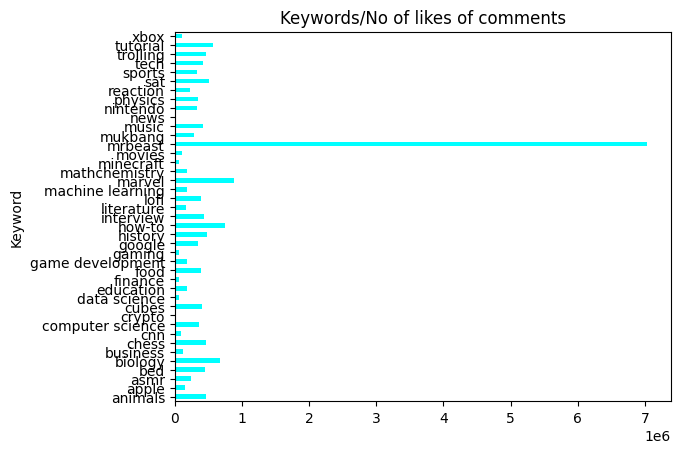

In [ ]:
(new_df.groupby("Keyword")["Likes_comments"].sum()).plot(title="Keywords/No of likes of comments",kind="barh",color="cyan")

<Axes: title={'center': 'Keyword Vs Sentiment'}, ylabel='Keyword'>

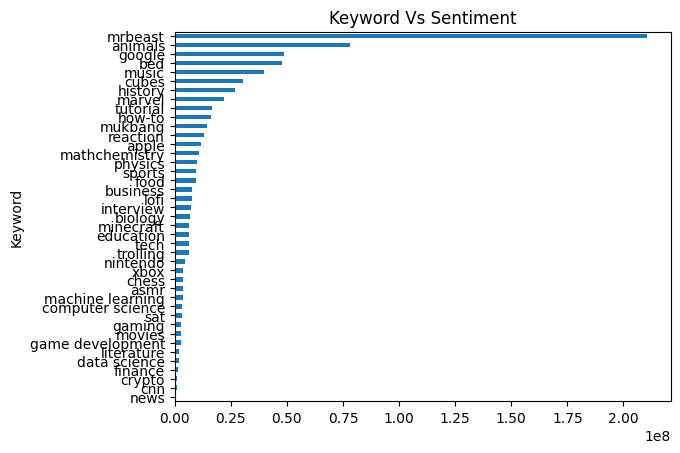

In [ ]:
(new_df.groupby("Keyword")["Likes_video"].mean()*100).sort_values().plot(kind="barh",title="Keyword Vs Sentiment")

<Axes: ylabel='Keyword'>

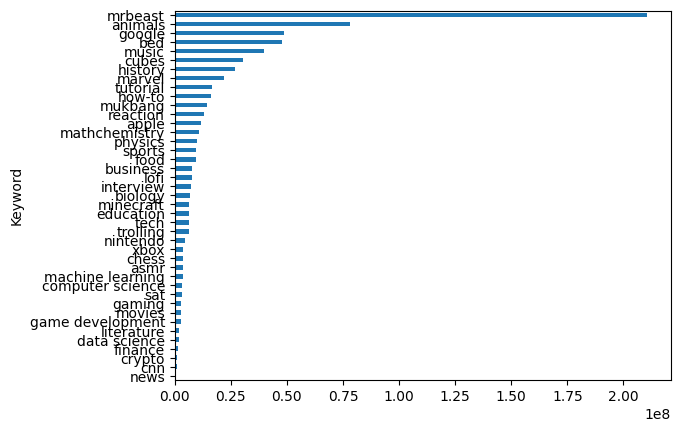

In [ ]:
(new_df.groupby("Keyword")["Likes_video"].mean()*100).sort_values().plot(kind="barh")

In [ ]:
new_df["Comment"].shape

(18525,)

In [ ]:
new_df["Comment"]

0        Let's not forget that Apple Pay in 2014 requir...
1        Here in NZ 50% of retailers don’t even have co...
2        I will forever acknowledge this channel with t...
3        Whenever I go to a place that doesn’t take App...
4        Apple Pay is so convenient, secure, and easy t...
                               ...                        
18619    As a GenX'er I enjoyed this interview so much....
18620    I took Ng's class on Coursera years ago. It sw...
18621    This man got a great voiceover career availabl...
18622    This week has been awesome! First Scott Aarons...
18623    Im a physician from Brazil learning ai and thi...
Name: Comment, Length: 18525, dtype: object

In [ ]:
new_df['Comment_processed']=new_df['Comment'].str.replace("[^a-zA-Z0-9]"," ")

<ipython-input-45-df5410857012>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['Comment_processed']=new_df['Comment'].str.replace("[^a-zA-Z0-9]"," ")


In [ ]:
new_df['Comment_processed']

0        Let s not forget that Apple Pay in 2014 requir...
1        Here in NZ 50  of retailers don t even have co...
2        I will forever acknowledge this channel with t...
3        Whenever I go to a place that doesn t take App...
4        Apple Pay is so convenient  secure  and easy t...
                               ...                        
18619    As a GenX er I enjoyed this interview so much ...
18620    I took Ng s class on Coursera years ago  It sw...
18621    This man got a great voiceover career availabl...
18622    This week has been awesome  First Scott Aarons...
18623    Im a physician from Brazil learning ai and thi...
Name: Comment_processed, Length: 18525, dtype: object

In [ ]:
new_df['Comment_processed'] =new_df['Comment_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
new_df['Comment_processed']

0        Let not forget that Apple Pay 2014 required br...
1        Here retailers don even have contactless credi...
2        will forever acknowledge this channel with the...
3        Whenever place that doesn take Apple Pay doesn...
4        Apple Pay convenient secure and easy use used ...
                               ...                        
18619    GenX enjoyed this interview much made actually...
18620    took class Coursera years ago switched career ...
18621    This man got great voiceover career available ...
18622    This week has been awesome First Scott Aaronso...
18623    physician from Brazil learning and this fine m...
Name: Comment_processed, Length: 18525, dtype: object

In [ ]:
new_df['Comment_processed'] = [row.lower() for row in new_df['Comment_processed']]

In [ ]:
new_df['Comment_processed']

0        let not forget that apple pay 2014 required br...
1        here retailers don even have contactless credi...
2        will forever acknowledge this channel with the...
3        whenever place that doesn take apple pay doesn...
4        apple pay convenient secure and easy use used ...
                               ...                        
18619    genx enjoyed this interview much made actually...
18620    took class coursera years ago switched career ...
18621    this man got great voiceover career available ...
18622    this week has been awesome first scott aaronso...
18623    physician from brazil learning and this fine m...
Name: Comment_processed, Length: 18525, dtype: object

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
new_df['Comment_processed'] = [remove_stopwords(r) for r in new_df['Comment_processed']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
new_df["Comment_processed"]

0        let forget apple pay 2014 required brand new i...
1        retailers even contactless credit card machine...
2        forever acknowledge channel help lessons ideas...
3        whenever place take apple pay happen often dra...
4        apple pay convenient secure easy use used kore...
                               ...                        
18619    genx enjoyed interview much made actually feel...
18620    took class coursera years ago switched career ...
18621     man got great voiceover career available anytime
18622    week awesome first scott aaronson andrew lex r...
18623    physician brazil learning fine man helped lot ...
Name: Comment_processed, Length: 18525, dtype: object

In [ ]:
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


new_df['Comment_processed'] = new_df['Comment_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
new_df["Comment_processed"]

0        let forget apple pay 2014 require brand new ip...
1        retailer even contactless credit card machine ...
2        forever acknowledge channel help lesson ideas ...
3        whenever place take apple pay happen often dra...
4        apple pay convenient secure easy use used kore...
                               ...                        
18619    genx enjoy interview much make actually feel l...
18620    take class coursera year ago switch career tra...
18621     man get great voiceover career available anytime
18622    week awesome first scott aaronson andrew lex r...
18623    physician brazil learn fine man help lot thank...
Name: Comment_processed, Length: 18525, dtype: object

In [ ]:
new_df

,Title,Video ID,Published At,Keyword,Likes_video,Comments,Views,Comment,Likes_comments,Sentiment,Comment_processed
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,let forget apple pay 2014 require brand new ip...
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,retailer even contactless credit card machine ...
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0,forever acknowledge channel help lesson ideas ...
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0,whenever place take apple pay happen often dra...
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,apple pay convenient secure easy use used kore...
...,...,...,...,...,...,...,...,...,...,...,...
18619,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0,genx enjoy interview much make actually feel l...
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0,take class coursera year ago switch career tra...
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0,man get great voiceover career available anytime
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0,week awesome first scott aaronson andrew lex r...


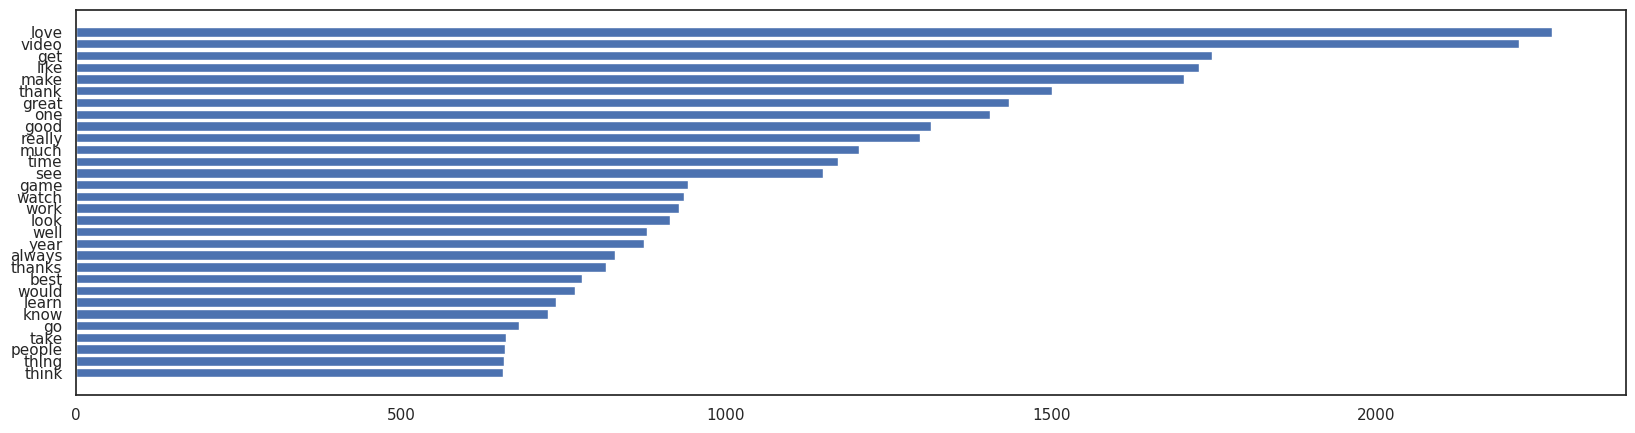

In [ ]:
##
## Plotting most frequent words from positive comments using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive comments dataset
all_words_df = new_df.loc[new_df['Sentiment'] ==2.0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['Comment_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30)

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

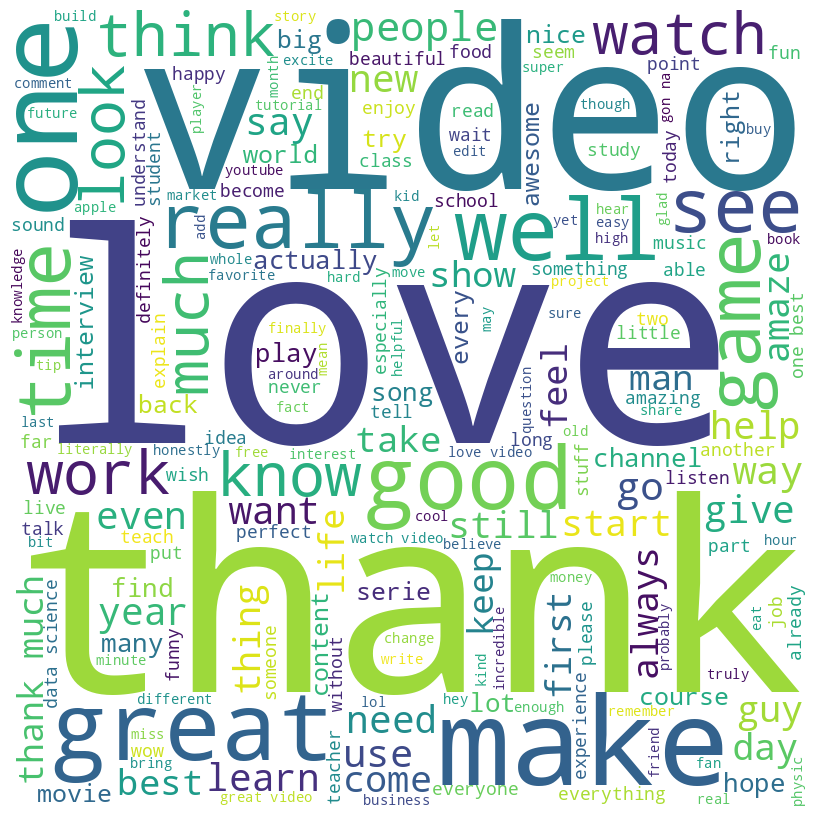

In [ ]:
##
## Bilding a Word Cloud
##
from wordcloud import WordCloud
word_cloud_df =new_df.loc[new_df['Sentiment'] == 2.0,:]
all_words = ' '.join([text for text in word_cloud_df['Comment_processed']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
new_df.head(10)

,Title,Video ID,Published At,Keyword,Likes_video,Comments,Views,Comment,Likes_comments,Sentiment,Comment_processed
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,let forget apple pay 2014 require brand new ip...
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,retailer even contactless credit card machine ...
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0,forever acknowledge channel help lesson ideas ...
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0,whenever place take apple pay happen often dra...
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,apple pay convenient secure easy use used kore...
5,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,We’ve been hounding my bank to adopt Apple pay...,8.0,1.0,hound bank adopt apple pay understand want ext...
6,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,We only got Apple Pay in South Africa in 2020/...,29.0,2.0,get apple pay south africa 2020 2021 widely ac...
7,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"For now, I need both Apple Pay and the physica...",7.0,1.0,need apple pay physical credit card
8,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"In the United States, we have an abundance of ...",2.0,2.0,united state abundance retailer accept apple p...
9,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"In Cambodia, we have a universal QR code syste...",28.0,1.0,cambodia universal code system scan send money...


In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head()

X = tfidf.fit_transform(new_df['Comment_processed']).toarray()
y = new_df["Likes_video"].values
'''featureNames = tfidf.get_feature_names()'''


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)


KeyError: ignored

In [ ]:
X_train.shape,X_test.shape

((14820, 2500), (3705, 2500))

In [ ]:
y_train.shape

(14820,)

In [ ]:
'''from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)'''

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
rsquared = r2_score(y_test,y_pred_lr)
# Compute rmse_lr

# Print rmse_lr
print("Linear Regression test set R2: {:.2f}".format(rsquared))

# Print rmse_dt
print("Linear Regression Score : ",  r2_score(y_test,y_pred_lr))
print("Regression Tree's Score : ",  r2_score(y_test,y_pred_lr))

Linear Regression test set R2: -4966262595845066533634048.00
Linear Regression Score :  -4.966262595845067e+24
Regression Tree's Score :  -4.966262595845067e+24


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))

Depth :  1  Train R2 :  0.05503654447701023  Val Score :  0.05215978215649767
Depth :  2  Train R2 :  0.0871209162025901  Val Score :  0.06994479843706278
Depth :  3  Train R2 :  0.10818629042483752  Val Score :  0.07229034986720453
Depth :  4  Train R2 :  0.13449083319989807  Val Score :  0.0902200901996837
Depth :  5  Train R2 :  0.15885279395839869  Val Score :  0.08859008291150255
Depth :  6  Train R2 :  0.1806247842090043  Val Score :  0.08090026199827788
Depth :  7  Train R2 :  0.2074755172802879  Val Score :  0.08146148460390569
Depth :  8  Train R2 :  0.23169380254225613  Val Score :  0.07822547250859295
Depth :  9  Train R2 :  0.25725213511763634  Val Score :  0.05624637614517669
Depth :  10  Train R2 :  0.27600073857322505  Val Score :  0.06617046415968211
Depth :  20  Train R2 :  0.3976139450145859  Val Score :  0.013332889758125488
Depth :  40  Train R2 :  0.5307550564133521  Val Score :  -0.05334265093106779
Depth :  60  Train R2 :  0.6633203374759873  Val Score :  -0.0826

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred

array([155828.71313928, 155828.71313928, 155828.71313928, ...,
       155828.71313928, 155828.71313928, 155828.71313928])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0058577748118830986

<ipython-input-103-1160473d9951>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(),annot=True)


<Axes: >

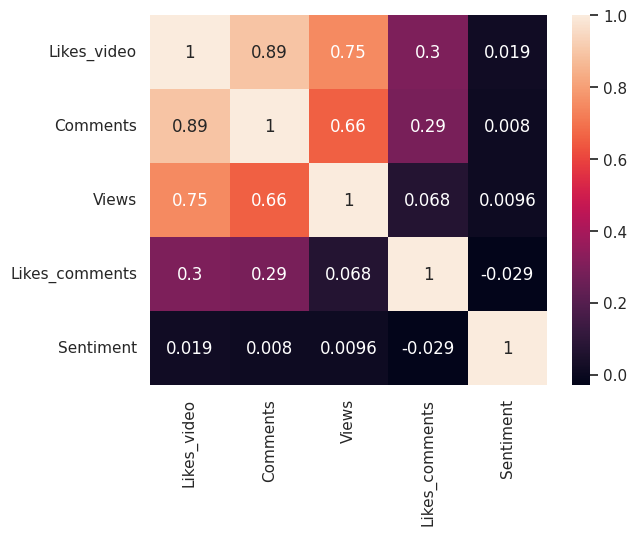

In [ ]:
sns.heatmap(new_df.corr(),annot=True)

In [ ]:
new_df.shape

(18525, 11)

In [ ]:
grp_df=new_df.groupby(["Video ID",'Likes_video'])["Comment_processed"].sum( )
grp_df

Video ID     Likes_video
--ZI0dSbbNU  378858.0       happy eat see suffer side screenfeel like zach...
--hxd1CrOqg  6379.0         really unfortunate intend target missheartfelt...
--ixiTypG8g  1029.0         big problem college charge outrage tuition fee...
-64r1hcxtV4  45628.0        thought happen timeidc guy health anymore choo...
-6IgkG5yZfo  10959.0        hope make life easy unit conversion metric sys...
                                                  ...                        
zvS8Fmxv1_U  1167.0         far weather absolutely crazy go deep thought p...
zvkDF3Hvq-0  207061.0       wow comportamiento ambas part fue muy diferent...
zxYjTTXc-J8  4437532.0      subscribe could fly one challengejimmy netflix...
zxtl5ExJmag  1499298.0      song call bed mean yall sleepqueen rap princes...
zzUn1prQ5Ps  6164.0         party instruct reject evidence eye ears final ...
Name: Comment_processed, Length: 1865, dtype: object

In [ ]:
grp_1=new_df.groupby('Video ID')[["Likes_video"]].sum( )
grp_1

,Likes_video
Video ID,
--ZI0dSbbNU,3788580.0
--hxd1CrOqg,63790.0
--ixiTypG8g,10290.0
-64r1hcxtV4,456280.0
-6IgkG5yZfo,109590.0
...,...
zvS8Fmxv1_U,11670.0
zvkDF3Hvq-0,2070610.0
zxYjTTXc-J8,44375320.0


In [ ]:
new_df

,Title,Video ID,Published At,Keyword,Likes_video,Comments,Views,Comment,Likes_comments,Sentiment,Comment_processed
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,let forget apple pay 2014 require brand new ip...
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,retailer even contactless credit card machine ...
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0,forever acknowledge channel help lesson ideas ...
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0,whenever place take apple pay happen often dra...
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,apple pay convenient secure easy use used kore...
...,...,...,...,...,...,...,...,...,...,...,...
18619,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,As a GenX'er I enjoyed this interview so much....,21.0,2.0,genx enjoy interview much make actually feel l...
18620,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,I took Ng's class on Coursera years ago. It sw...,159.0,2.0,take class coursera year ago switch career tra...
18621,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This man got a great voiceover career availabl...,66.0,2.0,man get great voiceover career available anytime
18622,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2020-02-20,machine learning,5198.0,443.0,226152.0,This week has been awesome! First Scott Aarons...,26.0,2.0,week awesome first scott aaronson andrew lex r...


In [ ]:
new_df=new_df[['Video ID','Likes_video','Comment_processed']]

In [ ]:
new_df

,Video ID,Likes_video,Comment_processed
0,wAZZ-UWGVHI,3407.0,let forget apple pay 2014 require brand new ip...
1,wAZZ-UWGVHI,3407.0,retailer even contactless credit card machine ...
2,wAZZ-UWGVHI,3407.0,forever acknowledge channel help lesson ideas ...
3,wAZZ-UWGVHI,3407.0,whenever place take apple pay happen often dra...
4,wAZZ-UWGVHI,3407.0,apple pay convenient secure easy use used kore...
...,...,...,...
18619,0jspaMLxBig,5198.0,genx enjoy interview much make actually feel l...
18620,0jspaMLxBig,5198.0,take class coursera year ago switch career tra...
18621,0jspaMLxBig,5198.0,man get great voiceover career available anytime
18622,0jspaMLxBig,5198.0,week awesome first scott aaronson andrew lex r...


In [ ]:
new_df.groupby('Video ID').sum()

<ipython-input-169-37f4ae21014d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby('Video ID').sum()


,Likes_video
Video ID,
--ZI0dSbbNU,3788580.0
--hxd1CrOqg,63790.0
--ixiTypG8g,10290.0
-64r1hcxtV4,456280.0
-6IgkG5yZfo,109590.0
...,...
zvS8Fmxv1_U,11670.0
zvkDF3Hvq-0,2070610.0
zxYjTTXc-J8,44375320.0


In [ ]:
g1=new_df.groupby('Video ID')['Comment_processed'].sum()

In [ ]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head()

X = tfidf.fit_transform(grp_df['Comment_processed']).toarray()
y = grp_df["Likes_video"].values
'''featureNames = tfidf.get_feature_names()'''


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)


KeyError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
y_pred

array([155828.71313928, 155828.71313928, 155828.71313928, ...,
       155828.71313928, 155828.71313928, 155828.71313928])

In [ ]:
grp_df.head()

,,Comment_processed
Video ID,Likes_video,
--ZI0dSbbNU,378858.0,happy eat see suffer side screenfeel like zach...
--hxd1CrOqg,6379.0,really unfortunate intend target missheartfelt...
--ixiTypG8g,1029.0,big problem college charge outrage tuition fee...
-64r1hcxtV4,45628.0,thought happen timeidc guy health anymore choo...
-6IgkG5yZfo,10959.0,hope make life easy unit conversion metric sys...


In [ ]:
grp_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 1865 entries, ('--ZI0dSbbNU', 378858.0) to ('zzUn1prQ5Ps', 6164.0)
Series name: Comment_processed
Non-Null Count  Dtype 
--------------  ----- 
1865 non-null   object
dtypes: object(1)
memory usage: 115.3+ KB


In [ ]:
grp_df.shape,grp_1.shape,new_df.shape

((1865, 1), (1859, 1), (18525, 11))

In [ ]:
df1.shape,df2.shape

((1879, 7), (18408, 4))